## Configurações iniciais

In [281]:
#!wget https://media.githubusercontent.com/media/juliacfaria/arquivosTPDados/main/DadosLimpos/dadosLimpos2019.csv

In [282]:
#!wget https://media.githubusercontent.com/media/juliacfaria/arquivosTPDados/main/DadosLimpos/dadosLimpos2020.csv

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [284]:
fies2019 = pd.read_csv('./dadosLimpos2019.csv', encoding="UTF-8")

fies2020 = pd.read_csv('./dadosLimpos2020.csv', encoding="UTF-8")

## Fies 2019

Primeiro serão realizadas análises para o dataframe do Fies 2019. Em seguida, o mesmo será feito para o Fies 2020

### Discretizar atributos numéricos

Conforme aprendido em sala de aula, esta técnica de aprendizagem necessita que os atributos numéricos utilizados sejam organizados em categorias, de modo que tal conversão se faz necessária.

Primeiro, então, analisaremos as colunas prentes no dataset após sua limpeza

In [285]:
fies2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232432 entries, 0 to 232431
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID do estudante                 232432 non-null  int64  
 1   Sexo                            232432 non-null  object 
 2   Data de Nascimento              232432 non-null  object 
 3   UF de residência                232432 non-null  object 
 4   Etnia/Cor                       232432 non-null  object 
 5   Pessoa com deficiência?         232432 non-null  object 
 6   Ano conclusão ensino médio      232432 non-null  int64  
 7   Concluiu curso superior?        232432 non-null  object 
 8   Nº de membros Grupo Familiar    232432 non-null  int64  
 9   Renda familiar mensal bruta     232432 non-null  float64
 10  Renda mensal bruta per capita   232432 non-null  float64
 11  UF                              232432 non-null  object 
 12  Área do conhecim

### Visando analisar regras de associação para a Média nota Enem

Como o campo "Média nota Enem" será avaliado nas conjunto de regras de associação, definiu-se as colunas de interesse como aquelas que pensamos que poderiam influir e/ou estar relacionadas com este campo, sendo elas:

'Sexo','UF de residência','Etnia/Cor','Pessoa com deficiência?','Ano conclusão ensino médio','Concluiu curso superior?','Nº de membros Grupo Familiar','Renda mensal bruta per capita','Média nota Enem'


Desta forma, dentre estes campos, os que forem numéricos serão convertidos em categorias

#### Convertendo Nº de membros Grupo Familiar

Os intervalores correspondentes a cada categoria foi definido com base nas estatísticas

In [286]:
fies2019['Nº de membros Grupo Familiar'].describe()

count    232432.000000
mean          2.220219
std           1.172808
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          25.000000
Name: Nº de membros Grupo Familiar, dtype: float64

In [287]:
bins = [0, 1, 2, np.inf]
names = ['MEMBROSFAMILIA<Q1','MEMBROSFAMILIA<Q2_Q3>','MEMBROSFAMILIA>Q3']
fies2019['cat_membros_familia'] = pd.cut(fies2019['Nº de membros Grupo Familiar'], bins, labels=names)
fies2019[['Nº de membros Grupo Familiar','cat_membros_familia']]

,Nº de membros Grupo Familiar,cat_membros_familia
0,2,MEMBROSFAMILIA<Q2_Q3>
1,3,MEMBROSFAMILIA>Q3
2,2,MEMBROSFAMILIA<Q2_Q3>
3,1,MEMBROSFAMILIA<Q1
4,3,MEMBROSFAMILIA>Q3
...,...,...
232427,2,MEMBROSFAMILIA<Q2_Q3>
232428,2,MEMBROSFAMILIA<Q2_Q3>
232429,2,MEMBROSFAMILIA<Q2_Q3>
232430,3,MEMBROSFAMILIA>Q3


Observe que agora um novo campo foi adicionado, o qual é uma categoria

In [288]:
fies2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232432 entries, 0 to 232431
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   ID do estudante                 232432 non-null  int64   
 1   Sexo                            232432 non-null  object  
 2   Data de Nascimento              232432 non-null  object  
 3   UF de residência                232432 non-null  object  
 4   Etnia/Cor                       232432 non-null  object  
 5   Pessoa com deficiência?         232432 non-null  object  
 6   Ano conclusão ensino médio      232432 non-null  int64   
 7   Concluiu curso superior?        232432 non-null  object  
 8   Nº de membros Grupo Familiar    232432 non-null  int64   
 9   Renda familiar mensal bruta     232432 non-null  float64 
 10  Renda mensal bruta per capita   232432 non-null  float64 
 11  UF                              232432 non-null  object  
 12  Ár

#### Convertendo Ano conclusão ensino médio

Os intervalores correspondentes a cada categoria foi definido com base nas estatísticas

In [289]:
fies2019['Ano conclusão ensino médio'].describe()

count    232432.000000
mean       2013.888957
std           5.222994
min        1961.000000
25%        2012.000000
50%        2016.000000
75%        2017.000000
max        2019.000000
Name: Ano conclusão ensino médio, dtype: float64

In [290]:
bins = [0, 2012, 2017, np.inf]
names = ['CONCLUSAOEM<Q1','CONCLUSAOEM<Q2_Q3>','CONCLUSAOEM>Q3']
fies2019['cat_ano_conclusao_em'] = pd.cut(fies2019['Ano conclusão ensino médio'], bins, labels=names)
fies2019[['Ano conclusão ensino médio','cat_ano_conclusao_em']]

,Ano conclusão ensino médio,cat_ano_conclusao_em
0,2006,CONCLUSAOEM<Q1
1,2014,CONCLUSAOEM<Q2_Q3>
2,2008,CONCLUSAOEM<Q1
3,1999,CONCLUSAOEM<Q1
4,2013,CONCLUSAOEM<Q2_Q3>
...,...,...
232427,2018,CONCLUSAOEM>Q3
232428,2019,CONCLUSAOEM>Q3
232429,2019,CONCLUSAOEM>Q3
232430,2018,CONCLUSAOEM>Q3


Observe, agora que um novo campo foi criado, o qual é categórico

In [291]:
fies2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232432 entries, 0 to 232431
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   ID do estudante                 232432 non-null  int64   
 1   Sexo                            232432 non-null  object  
 2   Data de Nascimento              232432 non-null  object  
 3   UF de residência                232432 non-null  object  
 4   Etnia/Cor                       232432 non-null  object  
 5   Pessoa com deficiência?         232432 non-null  object  
 6   Ano conclusão ensino médio      232432 non-null  int64   
 7   Concluiu curso superior?        232432 non-null  object  
 8   Nº de membros Grupo Familiar    232432 non-null  int64   
 9   Renda familiar mensal bruta     232432 non-null  float64 
 10  Renda mensal bruta per capita   232432 non-null  float64 
 11  UF                              232432 non-null  object  
 12  Ár

#### Convertendo Renda mensal bruta per capita

Os intervalores correspondentes a cada categoria foi definido com base nas estatísticas descritivas

In [292]:
 
fies2019['Renda mensal bruta per capita'].describe()

count    232432.000000
mean        938.779092
std         623.362271
min           0.000000
25%         499.000000
50%         760.000000
75%        1200.000000
max        9831.360000
Name: Renda mensal bruta per capita, dtype: float64

In [293]:
bins = [0, 499, 1200, np.inf]
names = ['RENDAPERCAPITA<Q1','RENDAPERCAPITA<Q2_Q3>','RENDAPERCAPITA>Q3']
fies2019['cat_renda_per_capita'] = pd.cut(fies2019['Renda mensal bruta per capita'], bins, labels=names)
fies2019[['Renda mensal bruta per capita','cat_renda_per_capita']]

,Renda mensal bruta per capita,cat_renda_per_capita
0,2066.67,RENDAPERCAPITA>Q3
1,652.49,RENDAPERCAPITA<Q2_Q3>
2,533.33,RENDAPERCAPITA<Q2_Q3>
3,1350.00,RENDAPERCAPITA>Q3
4,500.00,RENDAPERCAPITA<Q2_Q3>
...,...,...
232427,333.33,RENDAPERCAPITA<Q1
232428,993.33,RENDAPERCAPITA<Q2_Q3>
232429,993.33,RENDAPERCAPITA<Q2_Q3>
232430,606.69,RENDAPERCAPITA<Q2_Q3>


Observe que um novo campo foi criado, o qual é categórico

In [294]:
fies2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232432 entries, 0 to 232431
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   ID do estudante                 232432 non-null  int64   
 1   Sexo                            232432 non-null  object  
 2   Data de Nascimento              232432 non-null  object  
 3   UF de residência                232432 non-null  object  
 4   Etnia/Cor                       232432 non-null  object  
 5   Pessoa com deficiência?         232432 non-null  object  
 6   Ano conclusão ensino médio      232432 non-null  int64   
 7   Concluiu curso superior?        232432 non-null  object  
 8   Nº de membros Grupo Familiar    232432 non-null  int64   
 9   Renda familiar mensal bruta     232432 non-null  float64 
 10  Renda mensal bruta per capita   232432 non-null  float64 
 11  UF                              232432 non-null  object  
 12  Ár

#### Média nota Enem

Os intervalores correspondentes a cada categoria foi definido com base nas estatísticas

In [295]:
fies2019['Média nota Enem'].describe()

count    232432.000000
mean        547.551968
std          68.671015
min         450.000000
25%         497.620000
50%         532.560000
75%         578.865000
max         819.020000
Name: Média nota Enem, dtype: float64

In [296]:
bins = [0, 497.62, 578.865, np.inf]
names = ['MEDIAENEM<Q1','MEDIAENEM<Q2_Q3>','MEDIAENEM>Q3']
fies2019['cat_media_nota_enem'] = pd.cut(fies2019['Média nota Enem'], bins, labels=names)
fies2019[['Média nota Enem','cat_media_nota_enem']]

,Média nota Enem,cat_media_nota_enem
0,592.66,MEDIAENEM>Q3
1,626.32,MEDIAENEM>Q3
2,540.48,MEDIAENEM<Q2_Q3>
3,663.88,MEDIAENEM>Q3
4,557.50,MEDIAENEM<Q2_Q3>
...,...,...
232427,492.12,MEDIAENEM<Q1
232428,513.46,MEDIAENEM<Q2_Q3>
232429,513.46,MEDIAENEM<Q2_Q3>
232430,612.60,MEDIAENEM>Q3


Observe, agora, que um novo atributo foi criado, o qual é categórico

In [297]:
fies2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232432 entries, 0 to 232431
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   ID do estudante                 232432 non-null  int64   
 1   Sexo                            232432 non-null  object  
 2   Data de Nascimento              232432 non-null  object  
 3   UF de residência                232432 non-null  object  
 4   Etnia/Cor                       232432 non-null  object  
 5   Pessoa com deficiência?         232432 non-null  object  
 6   Ano conclusão ensino médio      232432 non-null  int64   
 7   Concluiu curso superior?        232432 non-null  object  
 8   Nº de membros Grupo Familiar    232432 non-null  int64   
 9   Renda familiar mensal bruta     232432 non-null  float64 
 10  Renda mensal bruta per capita   232432 non-null  float64 
 11  UF                              232432 non-null  object  
 12  Ár

### Selecionar atributos relevantes

Os atributos selecionados são aqueles que foram mencionados previamente, os quais foram definidos em razão da aparente relação com a média da nota do enem

In [298]:
df_rules = fies2019[['Sexo','UF de residência','Etnia/Cor','Pessoa com deficiência?','cat_ano_conclusao_em','Concluiu curso superior?','cat_membros_familia','cat_renda_per_capita','cat_media_nota_enem']]
df_rules.head()

,Sexo,UF de residência,Etnia/Cor,Pessoa com deficiência?,cat_ano_conclusao_em,Concluiu curso superior?,cat_membros_familia,cat_renda_per_capita,cat_media_nota_enem
0,M,PR,PARDA,NÃO,CONCLUSAOEM<Q1,NÃO,MEMBROSFAMILIA<Q2_Q3>,RENDAPERCAPITA>Q3,MEDIAENEM>Q3
1,M,PR,BRANCA,NÃO,CONCLUSAOEM<Q2_Q3>,NÃO,MEMBROSFAMILIA>Q3,RENDAPERCAPITA<Q2_Q3>,MEDIAENEM>Q3
2,M,PR,BRANCA,NÃO,CONCLUSAOEM<Q1,NÃO,MEMBROSFAMILIA<Q2_Q3>,RENDAPERCAPITA<Q2_Q3>,MEDIAENEM<Q2_Q3>
3,F,PR,BRANCA,NÃO,CONCLUSAOEM<Q1,NÃO,MEMBROSFAMILIA<Q1,RENDAPERCAPITA>Q3,MEDIAENEM>Q3
4,F,RS,BRANCA,NÃO,CONCLUSAOEM<Q2_Q3>,NÃO,MEMBROSFAMILIA>Q3,RENDAPERCAPITA<Q2_Q3>,MEDIAENEM<Q2_Q3>


In [299]:
df_transactions = pd.get_dummies(df_rules)

In [300]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232432 entries, 0 to 232431
Data columns (total 50 columns):
 #   Column                                      Non-Null Count   Dtype
---  ------                                      --------------   -----
 0   Sexo_F                                      232432 non-null  uint8
 1   Sexo_M                                      232432 non-null  uint8
 2   UF de residência_AC                         232432 non-null  uint8
 3   UF de residência_AL                         232432 non-null  uint8
 4   UF de residência_AM                         232432 non-null  uint8
 5   UF de residência_AP                         232432 non-null  uint8
 6   UF de residência_BA                         232432 non-null  uint8
 7   UF de residência_CE                         232432 non-null  uint8
 8   UF de residência_DF                         232432 non-null  uint8
 9   UF de residência_ES                         232432 non-null  uint8
 10  UF de residência_GO 

### Extrair itemsets frequentes

Uma vez que os itemsets foram obtidos, faz-se necessária a verificação de qual destes são mais frequentes. Para tanto, utiliza-se o apriori, assim como visto em aula.

Observe que a equipe definiu que o suporte mínimo deve ser de 0.15, para evitar que associações com um suporte muito baixo sejam avaliadas

In [301]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [302]:
frequent_itemsets = apriori(df_transactions, min_support=0.15, use_colnames=True)
frequent_itemsets.head()

/home/juliacfaria/Desktop/ProjetoDados/ProjetoCienciaDeDados/ambiente-dados1/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.653929,(Sexo_F)
1,0.346071,(Sexo_M)
2,0.353445,(Etnia/Cor_BRANCA)
3,0.497866,(Etnia/Cor_PARDA)
4,0.992153,(Pessoa com deficiência?_NÃO)


### Extrair as regras de associação usando Apriori

In [303]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [304]:
#rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules.sort_values(by="confidence",ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
774,"(cat_media_nota_enem_MEDIAENEM<Q2_Q3>, cat_ano_conclusao_em_CONCLUSAOEM<Q2_Q3>, Sexo_F)",(Pessoa com deficiência?_NÃO),0.167047,0.992153,0.166535,0.996935,1.004820,0.000799,2.560447
1277,"(cat_media_nota_enem_MEDIAENEM<Q2_Q3>, Concluiu curso superior?_NÃO, cat_ano_conclusao_em_CONCLUSAOEM<Q2_Q3>, Sexo_F)",(Pessoa com deficiência?_NÃO),0.161368,0.992153,0.160869,0.996907,1.004792,0.000767,2.537367
195,"(Sexo_F, cat_ano_conclusao_em_CONCLUSAOEM>Q3)",(Pessoa com deficiência?_NÃO),0.153813,0.992153,0.153301,0.996671,1.004555,0.000695,2.357600
1224,"(cat_media_nota_enem_MEDIAENEM<Q2_Q3>, Concluiu curso superior?_NÃO, Sexo_F, Etnia/Cor_PARDA)",(Pessoa com deficiência?_NÃO),0.154936,0.992153,0.154359,0.996279,1.004159,0.000639,2.108975
695,"(cat_media_nota_enem_MEDIAENEM<Q2_Q3>, Sexo_F, Etnia/Cor_PARDA)",(Pessoa com deficiência?_NÃO),0.165007,0.992153,0.164384,0.996219,1.004099,0.000671,2.075679


Conforme é possível visualizar abaixo, o item gerado pelo algoritmo à priori é um frozenset. Para facilitar a manipulação de tal item, estes foram convertidos para string

In [305]:
type(rules['consequents'][0])

frozenset

Convertendo para strings...

In [306]:
rules["consequents"] = rules["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

### Avaliando regras para cada intervalo de média definido

Uma vez que as regras de associação já foram definidas, deve-se avaliar as regras que se relacionam a cada categoria definida previamente pela equipe

#### MEDIAENEM<Q1

Avaliando regras que possuem como consequente "cat_media_nota_enem_MEDIAENEM<Q1"

In [307]:
regrasMediaQ1 = rules[rules['consequents'] == 'cat_media_nota_enem_MEDIAENEM<Q1']

In [308]:
regrasMediaQ1.sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
303,"(Concluiu curso superior?_NÃO, Sexo_F)",cat_media_nota_enem_MEDIAENEM<Q1,0.610604,0.250069,0.161630,0.264705,1.058529,0.008937,1.019905
853,"(Concluiu curso superior?_NÃO, Sexo_F, Pessoa com deficiência?_NÃO)",cat_media_nota_enem_MEDIAENEM<Q1,0.607287,0.250069,0.160404,0.264132,1.056236,0.008540,1.019111
27,(Sexo_F),cat_media_nota_enem_MEDIAENEM<Q1,0.653929,0.250069,0.169878,0.259780,1.038834,0.006350,1.013119
241,"(Sexo_F, Pessoa com deficiência?_NÃO)",cat_media_nota_enem_MEDIAENEM<Q1,0.650250,0.250069,0.168574,0.259245,1.036694,0.005967,1.012387
123,(Concluiu curso superior?_NÃO),cat_media_nota_enem_MEDIAENEM<Q1,0.935181,0.250069,0.239072,0.255643,1.022289,0.005212,1.007488
545,"(Concluiu curso superior?_NÃO, Pessoa com deficiência?_NÃO)",cat_media_nota_enem_MEDIAENEM<Q1,0.928065,0.250069,0.236736,0.255085,1.020061,0.004656,1.006735
89,(Pessoa com deficiência?_NÃO),cat_media_nota_enem_MEDIAENEM<Q1,0.992153,0.250069,0.247578,0.249536,0.997869,-0.000529,0.999290


#### MEDIAENEM<Q2_Q3>

Avaliando regras que possuem como consequente "cat_media_nota_enem_MEDIAENEM<Q2_Q3>"

In [309]:
regrasMediaQ2_Q3 = rules[rules['consequents'] == 'cat_media_nota_enem_MEDIAENEM<Q2_Q3>']

In [310]:
regrasMediaQ2_Q3.sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1156,"(Concluiu curso superior?_NÃO, cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3>, Pessoa com deficiência?_NÃO)",cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.468778,0.499931,0.246782,0.526437,1.053018,0.012425,1.055970
637,"(Concluiu curso superior?_NÃO, cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3>)",cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.472340,0.499931,0.248455,0.526009,1.052164,0.012318,1.055019
588,"(cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3>, Pessoa com deficiência?_NÃO)",cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.497802,0.499931,0.260941,0.524187,1.048517,0.012074,1.050977
141,(cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3>),cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.501592,0.499931,0.262739,0.523811,1.047766,0.011978,1.050147
1057,"(Concluiu curso superior?_NÃO, Etnia/Cor_PARDA, Pessoa com deficiência?_NÃO)",cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.462062,0.499931,0.240866,0.521285,1.042714,0.009867,1.044607
458,"(Concluiu curso superior?_NÃO, Etnia/Cor_PARDA)",cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.465611,0.499931,0.242411,0.520629,1.041401,0.009637,1.043176
1306,"(Concluiu curso superior?_NÃO, cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3>, Sexo_F, Pessoa com deficiência?_NÃO)",cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.305126,0.499931,0.158231,0.518577,1.037297,0.005689,1.038731
963,"(Concluiu curso superior?_NÃO, Sexo_M, Pessoa com deficiência?_NÃO)",cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.320778,0.499931,0.166328,0.518516,1.037174,0.005961,1.038598
1134,"(Concluiu curso superior?_NÃO, cat_membros_familia_MEMBROSFAMILIA<Q1, Pessoa com deficiência?_NÃO)",cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.302975,0.499931,0.157087,0.518482,1.037106,0.005620,1.038525
361,"(Concluiu curso superior?_NÃO, Sexo_M)",cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.324577,0.499931,0.168191,0.518186,1.036515,0.005925,1.037888


#### MEDIAENEM>Q3

Avaliando regras que possuem como consequente "cat_media_nota_enem_MEDIAENEM>Q3"

In [311]:
regrasMediaQ3 = rules[rules['consequents'] == 'cat_media_nota_enem_MEDIAENEM>Q3']

In [312]:
regrasMediaQ3.sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
93,(Pessoa com deficiência?_NÃO),cat_media_nota_enem_MEDIAENEM>Q3,0.992153,0.25,0.248047,0.250009,1.000035,0.000009,1.000012
31,(Sexo_F),cat_media_nota_enem_MEDIAENEM>Q3,0.653929,0.25,0.161449,0.246891,0.987565,-0.002033,0.995872
252,"(Sexo_F, Pessoa com deficiência?_NÃO)",cat_media_nota_enem_MEDIAENEM>Q3,0.650250,0.25,0.160464,0.246773,0.987091,-0.002098,0.995716
556,"(Concluiu curso superior?_NÃO, Pessoa com deficiência?_NÃO)",cat_media_nota_enem_MEDIAENEM>Q3,0.928065,0.25,0.223287,0.240594,0.962376,-0.008729,0.987614
126,(Concluiu curso superior?_NÃO),cat_media_nota_enem_MEDIAENEM>Q3,0.935181,0.25,0.224952,0.240544,0.962174,-0.008843,0.987548


### Calcula métricas

Para facilitar a obtenção de relação entre antecedentes e consequentes, utilizou-se uma função, a qual recebe estes valores como parâmetro e exibe métricas de acordo com estes

Observe que como consequentes foram passadas cada categoria para a media da nota do enem, enquanto como antecedentes foram informados valores que apareceram nas regras de associação de acordo com cada tipo

In [313]:
def calcula_metricas(att_antecedente, att_consequente):
  print("(",att_antecedente,") -> (",att_consequente,")")

  suporte = len(df_transactions[(df_transactions[att_antecedente] == 1) & (df_transactions[att_consequente] == 1) ])/ \
  len(df_transactions)
  print("Suporte: ",suporte)

  confianca = len(df_transactions[(df_transactions[att_antecedente] == 1) & (df_transactions[att_consequente] == 1) ])/ \
  len(df_transactions[df_transactions[att_antecedente] == 1])
  print("Confiança: ",confianca)

  lift = confianca / (len(df_transactions[df_transactions[att_consequente] == 1]) / len(df_transactions))

  print("Lift: ",lift)

  print("#########################")

display("MEDIAENEM<Q1")
calcula_metricas("Sexo_F","cat_media_nota_enem_MEDIAENEM<Q1")
calcula_metricas("Pessoa com deficiência?_NÃO","cat_media_nota_enem_MEDIAENEM<Q1")
calcula_metricas("Concluiu curso superior?_NÃO","cat_media_nota_enem_MEDIAENEM<Q1")

display(">MEDIAENEM<Q2_Q3>")
calcula_metricas("Etnia/Cor_PARDA","cat_media_nota_enem_MEDIAENEM<Q2_Q3>")
calcula_metricas("Pessoa com deficiência?_NÃO","cat_media_nota_enem_MEDIAENEM<Q2_Q3>")
calcula_metricas("Concluiu curso superior?_NÃO","cat_media_nota_enem_MEDIAENEM<Q2_Q3>")
calcula_metricas("cat_membros_familia_MEMBROSFAMILIA<Q1","cat_media_nota_enem_MEDIAENEM<Q2_Q3>")

display("MEDIAENEM<Q2_Q3>")
calcula_metricas("cat_renda_per_capita_RENDAPERCAPITA>Q3","cat_media_nota_enem_MEDIAENEM<Q2_Q3>")
calcula_metricas("Pessoa com deficiência?_SIM","cat_media_nota_enem_MEDIAENEM>Q3")
calcula_metricas("Concluiu curso superior?_NÃO","cat_media_nota_enem_MEDIAENEM>Q3")


'MEDIAENEM<Q1'

( Sexo_F ) -> ( cat_media_nota_enem_MEDIAENEM<Q1 )
Suporte:  0.16987764163282165
Confiança:  0.25977999131544666
Lift:  1.0388339230168588
#########################
( Pessoa com deficiência?_NÃO ) -> ( cat_media_nota_enem_MEDIAENEM<Q1 )
Suporte:  0.24757778619123014
Confiança:  0.24953600915839866
Lift:  0.9978692739781315
#########################
( Concluiu curso superior?_NÃO ) -> ( cat_media_nota_enem_MEDIAENEM<Q1 )
Suporte:  0.23907207269222827
Confiança:  0.25564255679361075
Lift:  1.0222887406347212
#########################


'>MEDIAENEM<Q2_Q3>'

( Etnia/Cor_PARDA ) -> ( cat_media_nota_enem_MEDIAENEM<Q2_Q3> )
Suporte:  0.2573785020995388
Confiança:  0.5169633598340823
Lift:  1.0340690847930758
#########################
( Pessoa com deficiência?_NÃO ) -> ( cat_media_nota_enem_MEDIAENEM<Q2_Q3> )
Suporte:  0.4965280167963103
Confiança:  0.5004553181155901
Lift:  1.0010484552516594
#########################
( Concluiu curso superior?_NÃO ) -> ( cat_media_nota_enem_MEDIAENEM<Q2_Q3> )
Suporte:  0.4711571556412198
Confiança:  0.5038138439314336
Lift:  1.0077664317785797
#########################
( cat_membros_familia_MEMBROSFAMILIA<Q1 ) -> ( cat_media_nota_enem_MEDIAENEM<Q2_Q3> )
Suporte:  0.16940868727197633
Confiança:  0.5143021342180194
Lift:  1.0287459006933106
#########################


'MEDIAENEM<Q2_Q3>'

( cat_renda_per_capita_RENDAPERCAPITA>Q3 ) -> ( cat_media_nota_enem_MEDIAENEM<Q2_Q3> )
Suporte:  0.09841157844014593
Confiança:  0.39985316225570744
Lift:  0.7998164389795059
#########################
( Pessoa com deficiência?_SIM ) -> ( cat_media_nota_enem_MEDIAENEM>Q3 )
Suporte:  0.0019532594479245544
Confiança:  0.24890350877192982
Lift:  0.9956140350877193
#########################
( Concluiu curso superior?_NÃO ) -> ( cat_media_nota_enem_MEDIAENEM>Q3 )
Suporte:  0.22495181386383975
Confiança:  0.2405435992749556
Lift:  0.9621743970998224
#########################


### Observando maior "confidence"

Neste momento, serão avaliadas as maiores confidences obtidas de acordo com o tipo de categoria da média da nota do enem

In [314]:
regrasMediaQ1[regrasMediaQ1['confidence'] == regrasMediaQ1.confidence.max()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
303,"(Concluiu curso superior?_NÃO, Sexo_F)",cat_media_nota_enem_MEDIAENEM<Q1,0.610604,0.250069,0.16163,0.264705,1.058529,0.008937,1.019905


In [315]:
regrasMediaQ2_Q3[regrasMediaQ2_Q3['confidence'] == regrasMediaQ2_Q3.confidence.max()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1156,"(Concluiu curso superior?_NÃO, cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3>, Pessoa com deficiência?_NÃO)",cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.468778,0.499931,0.246782,0.526437,1.053018,0.012425,1.05597


In [316]:
regrasMediaQ3[regrasMediaQ3['confidence'] == regrasMediaQ3.confidence.max()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
93,(Pessoa com deficiência?_NÃO),cat_media_nota_enem_MEDIAENEM>Q3,0.992153,0.25,0.248047,0.250009,1.000035,0.000009,1.000012


### Plotando gráficos

Para observar de forma visual se existem possíveis relações entre os campos apontados pelas regras de associação e as categorias estudadas, gráficos serão plotados considerando tais campos.

In [317]:
import seaborn as sns

#### Média nota Enem x Pessoa com deficiência?

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Como as pessoas com deficiência representam uma parcela pequena dos inscritos no FIES, as proporções avaliadas são bem diferentes

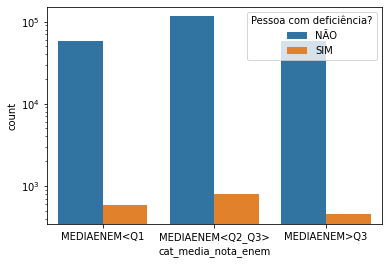

In [318]:
g = sns.countplot(x='cat_media_nota_enem', hue = 'Pessoa com deficiência?', data=fies2019)
g.set_yscale("log")

#### Média nota Enem x Sexo?

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Conforme é possível observar, aparentemente neste ano, tem-se mais mulheres inscritas no FIES do que homens, o que também influencia nos dados

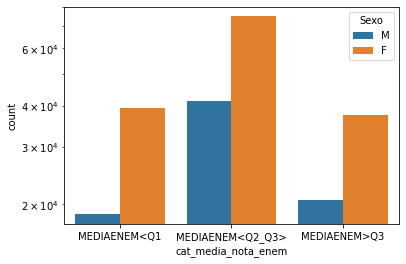

In [319]:
g = sns.countplot(x='cat_media_nota_enem', hue = 'Sexo', data=fies2019)
g.set_yscale("log")

#### Média nota Enem x Concluiu Curso Superior?

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Assim como no caso das pessoas com deficiência, as pessoas que concluiram curso superior também representam uma parcela muito menor dos participantes do FIES

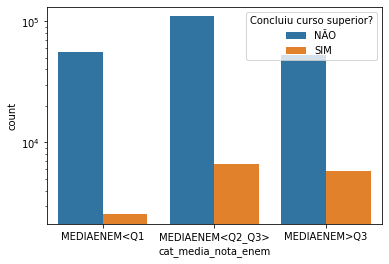

In [320]:
g = sns.countplot(x='cat_media_nota_enem', hue = 'Concluiu curso superior?', data=fies2019)
g.set_yscale("log")

#### Média nota Enem x Nº de membros família

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Neste caso, o que apresenta ter uma relação maior é no caso da nota média do enem ser acima do quartil 3 e a família possuir mais que 3 membros.

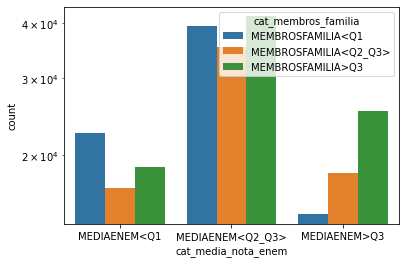

In [321]:
g = sns.countplot(x='cat_media_nota_enem', hue = 'cat_membros_familia', data=fies2019)
g.set_yscale("log")

#### Média nota Enem x Renda Per capita?

Uma outra correlação clara é entre a renda per capita entre o Q2 e o Q3 e possuir uma nota média para o enem, assim como observado no gráfico

<AxesSubplot:xlabel='cat_media_nota_enem', ylabel='count'>

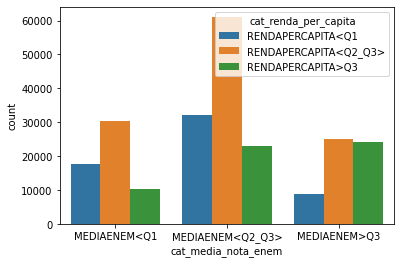

In [322]:
#g.set_yscale("log")
sns.countplot(x='cat_media_nota_enem', hue = 'cat_renda_per_capita', data=fies2019)

#### Média nota Enem x Ano de conclusão do Ensino Médio

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Por meio de tal gráfico pode-se observar, também que há mais pessoas presentes entre o quartil 2 e 3 de conclusão do ensino médio

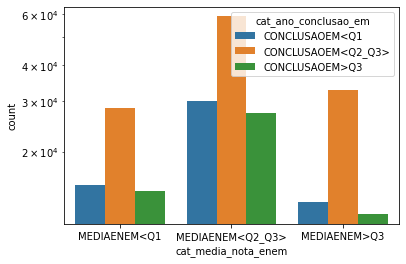

In [323]:
g = sns.countplot(x='cat_media_nota_enem', hue = 'cat_ano_conclusao_em', data=fies2019)
g.set_yscale("log")

#### Média nota Enem x Etnia/Cor

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Por meio de tal gráfico pode-se observar, também que há mais pessoas presentes entre o quartil 2 e 3 que são pardas, assim como indicado pelas regras de associação

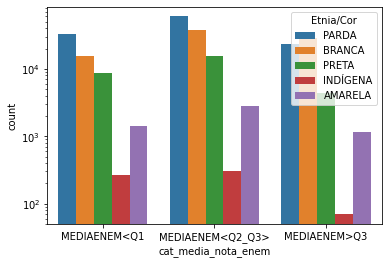

In [324]:
g = sns.countplot(x='cat_media_nota_enem', hue = 'Etnia/Cor', data=fies2019)
g.set_yscale("log")

### Breve teste

Visando avaliar se alguns atributos afetavam as regras de classificação, estes foram removidos para verificar os resultados obtidos. Assim: removeu-se os campos: sexo, possui deficiência e concluiu curso superior?

Os resultados em questão são apresentados a seguir

In [325]:
df_rules2 = fies2019[['UF de residência','Etnia/Cor','cat_ano_conclusao_em','cat_membros_familia','cat_renda_per_capita', 'cat_media_nota_enem']]
df_rules2.head()

,UF de residência,Etnia/Cor,cat_ano_conclusao_em,cat_membros_familia,cat_renda_per_capita,cat_media_nota_enem
0,PR,PARDA,CONCLUSAOEM<Q1,MEMBROSFAMILIA<Q2_Q3>,RENDAPERCAPITA>Q3,MEDIAENEM>Q3
1,PR,BRANCA,CONCLUSAOEM<Q2_Q3>,MEMBROSFAMILIA>Q3,RENDAPERCAPITA<Q2_Q3>,MEDIAENEM>Q3
2,PR,BRANCA,CONCLUSAOEM<Q1,MEMBROSFAMILIA<Q2_Q3>,RENDAPERCAPITA<Q2_Q3>,MEDIAENEM<Q2_Q3>
3,PR,BRANCA,CONCLUSAOEM<Q1,MEMBROSFAMILIA<Q1,RENDAPERCAPITA>Q3,MEDIAENEM>Q3
4,RS,BRANCA,CONCLUSAOEM<Q2_Q3>,MEMBROSFAMILIA>Q3,RENDAPERCAPITA<Q2_Q3>,MEDIAENEM<Q2_Q3>


In [326]:
df_transactions2 = pd.get_dummies(df_rules2)

In [327]:
frequent_itemsets2 = apriori(df_transactions2, min_support=0.15, use_colnames=True)
frequent_itemsets2.head()

/home/juliacfaria/Desktop/ProjetoDados/ProjetoCienciaDeDados/ambiente-dados1/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.353445,(Etnia/Cor_BRANCA)
1,0.497866,(Etnia/Cor_PARDA)
2,0.251966,(cat_ano_conclusao_em_CONCLUSAOEM<Q1)
3,0.516005,(cat_ano_conclusao_em_CONCLUSAOEM<Q2_Q3>)
4,0.232029,(cat_ano_conclusao_em_CONCLUSAOEM>Q3)


In [328]:
#rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.2)
rules2.sort_values(by="confidence",ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,(cat_membros_familia_MEMBROSFAMILIA<Q1),(cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3>),0.329395,0.501592,0.195756,0.594290,1.184807,0.030534,1.228483
0,(Etnia/Cor_BRANCA),(cat_ano_conclusao_em_CONCLUSAOEM<Q2_Q3>),0.353445,0.516005,0.191987,0.543188,1.052681,0.009608,1.059507
21,(cat_membros_familia_MEMBROSFAMILIA>Q3),(cat_ano_conclusao_em_CONCLUSAOEM<Q2_Q3>),0.367884,0.516005,0.195317,0.530921,1.028907,0.005488,1.031799
38,(cat_media_nota_enem_MEDIAENEM<Q2_Q3>),(cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3>),0.499931,0.501592,0.262739,0.525551,1.047766,0.011978,1.050498
39,(cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3>),(cat_media_nota_enem_MEDIAENEM<Q2_Q3>),0.501592,0.499931,0.262739,0.523811,1.047766,0.011978,1.050147


In [329]:
rules2["consequents"] = rules2["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

In [330]:
regrasMediaQ1 = rules2[rules2['consequents'] == 'cat_media_nota_enem_MEDIAENEM<Q1']

In [331]:
regrasMediaQ1.sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [332]:
regrasMediaQ2_Q3 = rules2[rules2['consequents'] == 'cat_media_nota_enem_MEDIAENEM<Q2_Q3>']

In [333]:
regrasMediaQ2_Q3.sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
39,(cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3>),cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.501592,0.499931,0.262739,0.523811,1.047766,0.011978,1.050147
15,(Etnia/Cor_PARDA),cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.497866,0.499931,0.257379,0.516963,1.034069,0.008480,1.035261
29,(cat_membros_familia_MEMBROSFAMILIA<Q1),cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.329395,0.499931,0.169409,0.514302,1.028746,0.004734,1.029588
33,(cat_membros_familia_MEMBROSFAMILIA<Q2_Q3>),cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.302721,0.499931,0.152143,0.502587,1.005312,0.000804,1.005339
25,(cat_ano_conclusao_em_CONCLUSAOEM<Q2_Q3>),cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.516005,0.499931,0.253816,0.491887,0.983910,-0.004151,0.984169
37,(cat_membros_familia_MEMBROSFAMILIA>Q3),cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.367884,0.499931,0.178379,0.484879,0.969891,-0.005538,0.970779
5,(Etnia/Cor_BRANCA),cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.353445,0.499931,0.162452,0.459624,0.919374,-0.014247,0.925408


In [334]:
regrasMediaQ3 = rules2[rules2['consequents'] == 'cat_media_nota_enem_MEDIAENEM>Q3']

In [335]:
regrasMediaQ3.sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


Conforme é possível visualizar, após a remoção de tais campos, diminuiu-se as regras de associação presentes que atendem aos critérios estabelecidos. Todavia, manteve-se as regras que aparentam ter forte correlação, tal qual a renda e a nota do enem no caso em que estas se encontram no quartil medio.

## Fies 2020

### Discretizar atributos numéricos

Conforme aprendido em sala de aula, esta técnica de aprendizagem necessita que os atributos numéricos utilizados sejam organizados em categorias, de modo que tal conversão se faz necessária.

Primeiro, então, analisaremos as colunas prentes no dataset após sua limpeza

In [336]:
fies2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182425 entries, 0 to 182424
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID do estudante                 182425 non-null  int64  
 1   Sexo                            182425 non-null  object 
 2   Data de Nascimento              182425 non-null  object 
 3   UF de residência                182425 non-null  object 
 4   Etnia/Cor                       182425 non-null  object 
 5   Pessoa com deficiência?         182425 non-null  object 
 6   Ano conclusão ensino médio      182425 non-null  int64  
 7   Concluiu curso superior?        182425 non-null  object 
 8   Nº de membros Grupo Familiar    182425 non-null  int64  
 9   Renda familiar mensal bruta     182425 non-null  float64
 10  Renda mensal bruta per capita   182425 non-null  float64
 11  UF                              182425 non-null  object 
 12  Área do conhecim

### Visando analisar regras de associação para a Média nota Enem

Como o campo "Média nota Enem" será avaliado nas conjunto de regras de associação, definiu-se as colunas de interesse como aquelas que pensamos que poderiam influir e/ou estar relacionadas com este campo, sendo elas:

'Sexo','UF de residência','Etnia/Cor','Pessoa com deficiência?','Ano conclusão ensino médio','Concluiu curso superior?','Nº de membros Grupo Familiar','Renda mensal bruta per capita','Média nota Enem'


Desta forma, dentre estes campos, os que forem numéricos serão convertidos em categorias

#### Convertendo Nº de membros Grupo Familiar

Os intervalores correspondentes a cada categoria foi definido com base nas estatísticas

In [337]:
fies2020['Nº de membros Grupo Familiar'].describe()

count    182425.000000
mean          2.143681
std           1.120011
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          13.000000
Name: Nº de membros Grupo Familiar, dtype: float64

In [338]:
bins = [0, 1, 2, np.inf]
names = ['MEMBROSFAMILIA<Q1','MEMBROSFAMILIA<Q2_Q3>','MEMBROSFAMILIA>Q3']
fies2020['cat_membros_familia'] = pd.cut(fies2020['Nº de membros Grupo Familiar'], bins, labels=names)
fies2020[['Nº de membros Grupo Familiar','cat_membros_familia']]

,Nº de membros Grupo Familiar,cat_membros_familia
0,3,MEMBROSFAMILIA>Q3
1,2,MEMBROSFAMILIA<Q2_Q3>
2,2,MEMBROSFAMILIA<Q2_Q3>
3,3,MEMBROSFAMILIA>Q3
4,3,MEMBROSFAMILIA>Q3
...,...,...
182420,1,MEMBROSFAMILIA<Q1
182421,2,MEMBROSFAMILIA<Q2_Q3>
182422,3,MEMBROSFAMILIA>Q3
182423,3,MEMBROSFAMILIA>Q3


Observe que agora um novo campo foi adicionado, o qual é uma categoria

In [339]:
fies2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182425 entries, 0 to 182424
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   ID do estudante                 182425 non-null  int64   
 1   Sexo                            182425 non-null  object  
 2   Data de Nascimento              182425 non-null  object  
 3   UF de residência                182425 non-null  object  
 4   Etnia/Cor                       182425 non-null  object  
 5   Pessoa com deficiência?         182425 non-null  object  
 6   Ano conclusão ensino médio      182425 non-null  int64   
 7   Concluiu curso superior?        182425 non-null  object  
 8   Nº de membros Grupo Familiar    182425 non-null  int64   
 9   Renda familiar mensal bruta     182425 non-null  float64 
 10  Renda mensal bruta per capita   182425 non-null  float64 
 11  UF                              182425 non-null  object  
 12  Ár

#### Convertendo Ano conclusão ensino médio

Os intervalores correspondentes a cada categoria foi definido com base nas estatísticas

In [340]:
fies2020['Ano conclusão ensino médio'].describe()

count    182425.000000
mean       2014.810147
std           5.335522
min        1970.000000
25%        2013.000000
50%        2017.000000
75%        2018.000000
max        2020.000000
Name: Ano conclusão ensino médio, dtype: float64

In [341]:
bins = [0, 2013, 2018, np.inf]
names = ['CONCLUSAOEM<Q1','CONCLUSAOEM<Q2_Q3>','CONCLUSAOEM>Q3']
fies2020['cat_ano_conclusao_em'] = pd.cut(fies2020['Ano conclusão ensino médio'], bins, labels=names)
fies2020[['Ano conclusão ensino médio','cat_ano_conclusao_em']]

,Ano conclusão ensino médio,cat_ano_conclusao_em
0,2019,CONCLUSAOEM>Q3
1,1994,CONCLUSAOEM<Q1
2,1994,CONCLUSAOEM<Q1
3,2020,CONCLUSAOEM>Q3
4,2016,CONCLUSAOEM<Q2_Q3>
...,...,...
182420,2011,CONCLUSAOEM<Q1
182421,2015,CONCLUSAOEM<Q2_Q3>
182422,2015,CONCLUSAOEM<Q2_Q3>
182423,2018,CONCLUSAOEM<Q2_Q3>


Observe, agora que um novo campo foi criado, o qual é categórico


In [342]:
fies2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182425 entries, 0 to 182424
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   ID do estudante                 182425 non-null  int64   
 1   Sexo                            182425 non-null  object  
 2   Data de Nascimento              182425 non-null  object  
 3   UF de residência                182425 non-null  object  
 4   Etnia/Cor                       182425 non-null  object  
 5   Pessoa com deficiência?         182425 non-null  object  
 6   Ano conclusão ensino médio      182425 non-null  int64   
 7   Concluiu curso superior?        182425 non-null  object  
 8   Nº de membros Grupo Familiar    182425 non-null  int64   
 9   Renda familiar mensal bruta     182425 non-null  float64 
 10  Renda mensal bruta per capita   182425 non-null  float64 
 11  UF                              182425 non-null  object  
 12  Ár

#### Convertendo Renda mensal bruta per capita

Os intervalores correspondentes a cada categoria foi definido com base nas estatísticas descritivas

In [343]:
 
fies2020['Renda mensal bruta per capita'].describe()

count    182425.000000
mean        977.875462
std         635.383838
min           0.000000
25%         522.500000
50%         786.670000
75%        1250.000000
max        7805.530000
Name: Renda mensal bruta per capita, dtype: float64

In [344]:
bins = [0, 522.5, 1250, np.inf]
names = ['RENDAPERCAPITA<Q1','RENDAPERCAPITA<Q2_Q3>','RENDAPERCAPITA>Q3']
fies2020['cat_renda_per_capita'] = pd.cut(fies2020['Renda mensal bruta per capita'], bins, labels=names)
fies2020[['Renda mensal bruta per capita','cat_renda_per_capita']]

,Renda mensal bruta per capita,cat_renda_per_capita
0,600.00,RENDAPERCAPITA<Q2_Q3>
1,594.86,RENDAPERCAPITA<Q2_Q3>
2,594.86,RENDAPERCAPITA<Q2_Q3>
3,762.50,RENDAPERCAPITA<Q2_Q3>
4,300.00,RENDAPERCAPITA<Q1
...,...,...
182420,2000.00,RENDAPERCAPITA>Q3
182421,1441.66,RENDAPERCAPITA>Q3
182422,965.50,RENDAPERCAPITA<Q2_Q3>
182423,1850.00,RENDAPERCAPITA>Q3


Observe que um novo campo foi criado, o qual é categórico

In [345]:
fies2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182425 entries, 0 to 182424
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   ID do estudante                 182425 non-null  int64   
 1   Sexo                            182425 non-null  object  
 2   Data de Nascimento              182425 non-null  object  
 3   UF de residência                182425 non-null  object  
 4   Etnia/Cor                       182425 non-null  object  
 5   Pessoa com deficiência?         182425 non-null  object  
 6   Ano conclusão ensino médio      182425 non-null  int64   
 7   Concluiu curso superior?        182425 non-null  object  
 8   Nº de membros Grupo Familiar    182425 non-null  int64   
 9   Renda familiar mensal bruta     182425 non-null  float64 
 10  Renda mensal bruta per capita   182425 non-null  float64 
 11  UF                              182425 non-null  object  
 12  Ár

#### Média nota Enem

Os intervalores correspondentes a cada categoria foi definido com base nas estatísticas

In [346]:
fies2020['Média nota Enem'].describe()

count    182425.000000
mean        554.860208
std          73.288827
min         450.000000
25%         499.160000
50%         537.060000
75%         594.940000
max         799.840000
Name: Média nota Enem, dtype: float64

In [347]:
bins = [0, 499.16, 594.94, np.inf]
names = ['MEDIAENEM<Q1','MEDIAENEM<Q2_Q3>','MEDIAENEM>Q3']
fies2020['cat_media_nota_enem'] = pd.cut(fies2020['Média nota Enem'], bins, labels=names)
fies2020[['Média nota Enem','cat_media_nota_enem']]

,Média nota Enem,cat_media_nota_enem
0,521.68,MEDIAENEM<Q2_Q3>
1,645.34,MEDIAENEM>Q3
2,645.34,MEDIAENEM>Q3
3,523.46,MEDIAENEM<Q2_Q3>
4,534.44,MEDIAENEM<Q2_Q3>
...,...,...
182420,575.60,MEDIAENEM<Q2_Q3>
182421,605.92,MEDIAENEM>Q3
182422,543.58,MEDIAENEM<Q2_Q3>
182423,498.02,MEDIAENEM<Q1


Observe, agora, que um novo atributo foi criado, o qual é categórico

In [348]:
fies2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182425 entries, 0 to 182424
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   ID do estudante                 182425 non-null  int64   
 1   Sexo                            182425 non-null  object  
 2   Data de Nascimento              182425 non-null  object  
 3   UF de residência                182425 non-null  object  
 4   Etnia/Cor                       182425 non-null  object  
 5   Pessoa com deficiência?         182425 non-null  object  
 6   Ano conclusão ensino médio      182425 non-null  int64   
 7   Concluiu curso superior?        182425 non-null  object  
 8   Nº de membros Grupo Familiar    182425 non-null  int64   
 9   Renda familiar mensal bruta     182425 non-null  float64 
 10  Renda mensal bruta per capita   182425 non-null  float64 
 11  UF                              182425 non-null  object  
 12  Ár

### Selecionar atributos relevantes

Os atributos selecionados são aqueles que foram mencionados previamente, os quais foram definidos em razão da aparente relação com a média da nota do enem

In [349]:
df_rules = fies2020[['Sexo','UF de residência','Etnia/Cor','Pessoa com deficiência?','cat_ano_conclusao_em','Concluiu curso superior?','cat_membros_familia','cat_renda_per_capita','cat_media_nota_enem']]
df_rules.head()

,Sexo,UF de residência,Etnia/Cor,Pessoa com deficiência?,cat_ano_conclusao_em,Concluiu curso superior?,cat_membros_familia,cat_renda_per_capita,cat_media_nota_enem
0,F,PR,BRANCA,NÃO,CONCLUSAOEM>Q3,NÃO,MEMBROSFAMILIA>Q3,RENDAPERCAPITA<Q2_Q3>,MEDIAENEM<Q2_Q3>
1,F,PR,BRANCA,NÃO,CONCLUSAOEM<Q1,NÃO,MEMBROSFAMILIA<Q2_Q3>,RENDAPERCAPITA<Q2_Q3>,MEDIAENEM>Q3
2,F,PR,BRANCA,NÃO,CONCLUSAOEM<Q1,NÃO,MEMBROSFAMILIA<Q2_Q3>,RENDAPERCAPITA<Q2_Q3>,MEDIAENEM>Q3
3,F,PR,BRANCA,NÃO,CONCLUSAOEM>Q3,NÃO,MEMBROSFAMILIA>Q3,RENDAPERCAPITA<Q2_Q3>,MEDIAENEM<Q2_Q3>
4,F,PR,BRANCA,NÃO,CONCLUSAOEM<Q2_Q3>,NÃO,MEMBROSFAMILIA>Q3,RENDAPERCAPITA<Q1,MEDIAENEM<Q2_Q3>


In [350]:
df_transactions = pd.get_dummies(df_rules)

In [351]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182425 entries, 0 to 182424
Data columns (total 50 columns):
 #   Column                                      Non-Null Count   Dtype
---  ------                                      --------------   -----
 0   Sexo_F                                      182425 non-null  uint8
 1   Sexo_M                                      182425 non-null  uint8
 2   UF de residência_AC                         182425 non-null  uint8
 3   UF de residência_AL                         182425 non-null  uint8
 4   UF de residência_AM                         182425 non-null  uint8
 5   UF de residência_AP                         182425 non-null  uint8
 6   UF de residência_BA                         182425 non-null  uint8
 7   UF de residência_CE                         182425 non-null  uint8
 8   UF de residência_DF                         182425 non-null  uint8
 9   UF de residência_ES                         182425 non-null  uint8
 10  UF de residência_GO 

### Extrair itemsets frequentes

Uma vez que os itemsets foram obtidos, faz-se necessária a verificação de qual destes são mais frequentes. Para tanto, utiliza-se o apriori, assim como visto em aula.

Observe que a equipe definiu que o suporte mínimo deve ser de 0.15, para evitar que associações com um suporte muito baixo sejam avaliadas

In [352]:
frequent_itemsets = apriori(df_transactions, min_support=0.15, use_colnames=True)
frequent_itemsets.head()

/home/juliacfaria/Desktop/ProjetoDados/ProjetoCienciaDeDados/ambiente-dados1/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.687877,(Sexo_F)
1,0.312123,(Sexo_M)
2,0.376631,(Etnia/Cor_BRANCA)
3,0.472693,(Etnia/Cor_PARDA)
4,0.991569,(Pessoa com deficiência?_NÃO)


In [353]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules.sort_values(by="confidence",ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
703,"(Concluiu curso superior?_NÃO, Sexo_F, cat_ano_conclusao_em_CONCLUSAOEM>Q3)",(Pessoa com deficiência?_NÃO),0.153877,0.991569,0.153356,0.996616,1.005089,0.000777,2.491187
193,"(Sexo_F, cat_ano_conclusao_em_CONCLUSAOEM>Q3)",(Pessoa com deficiência?_NÃO),0.168244,0.991569,0.167631,0.996351,1.004822,0.000804,2.310357
1051,"(cat_media_nota_enem_MEDIAENEM<Q2_Q3>, Concluiu curso superior?_NÃO, cat_ano_conclusao_em_CONCLUSAOEM<Q2_Q3>, Sexo_F)",(Pessoa com deficiência?_NÃO),0.154568,0.991569,0.153893,0.995638,1.004103,0.000629,1.932724
466,"(Concluiu curso superior?_NÃO, cat_ano_conclusao_em_CONCLUSAOEM>Q3)",(Pessoa com deficiência?_NÃO),0.220156,0.991569,0.219180,0.995568,1.004033,0.000880,1.902249
610,"(cat_ano_conclusao_em_CONCLUSAOEM<Q2_Q3>, Sexo_F, Etnia/Cor_PARDA)",(Pessoa com deficiência?_NÃO),0.161535,0.991569,0.160817,0.995554,1.004019,0.000644,1.896493


Conforme é possível visualizar abaixo, o item gerado pelo algoritmo à priori é um frozenset. Para facilitar a manipulação de tal item, estes foram convertidos para string

In [354]:
type(rules['consequents'][0])

frozenset

Convertendo para strings...

In [355]:
rules["consequents"] = rules["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

### Avaliando regras para cada intervalo de média definido

Uma vez que as regras de associação já foram definidas, deve-se avaliar as regras que se relacionam a cada categoria definida previamente pela equipe

#### MEDIAENEM<Q1

Avaliando regras que possuem como consequente "cat_media_nota_enem_MEDIAENEM<Q1"

In [356]:
regrasMediaQ1 = rules[rules['consequents'] == 'cat_media_nota_enem_MEDIAENEM<Q1']

In [357]:
regrasMediaQ1.sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
308,"(Concluiu curso superior?_NÃO, Sexo_F)",cat_media_nota_enem_MEDIAENEM<Q1,0.608568,0.250108,0.162615,0.267209,1.068373,0.010407,1.023336
783,"(Concluiu curso superior?_NÃO, Sexo_F, Pessoa com deficiência?_NÃO)",cat_media_nota_enem_MEDIAENEM<Q1,0.605125,0.250108,0.161601,0.267053,1.067750,0.010254,1.023119
27,(Sexo_F),cat_media_nota_enem_MEDIAENEM<Q1,0.687877,0.250108,0.178194,0.259049,1.035747,0.006150,1.012066
240,"(Sexo_F, Pessoa com deficiência?_NÃO)",cat_media_nota_enem_MEDIAENEM<Q1,0.683443,0.250108,0.176955,0.258917,1.035220,0.006020,1.011886
123,(Concluiu curso superior?_NÃO),cat_media_nota_enem_MEDIAENEM<Q1,0.886112,0.250108,0.228905,0.258325,1.032853,0.007281,1.011079
509,"(Concluiu curso superior?_NÃO, Pessoa com deficiência?_NÃO)",cat_media_nota_enem_MEDIAENEM<Q1,0.879265,0.250108,0.226926,0.258086,1.031897,0.007015,1.010753
89,(Pessoa com deficiência?_NÃO),cat_media_nota_enem_MEDIAENEM<Q1,0.991569,0.250108,0.247817,0.249924,0.999263,-0.000183,0.999754


#### MEDIAENEM<Q2_Q3>

Avaliando regras que possuem como consequente "cat_media_nota_enem_MEDIAENEM<Q2_Q3>"

In [358]:
regrasMediaQ2_Q3 = rules[rules['consequents'] == 'cat_media_nota_enem_MEDIAENEM<Q2_Q3>']

In [359]:
regrasMediaQ2_Q3.sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1011,"(Concluiu curso superior?_NÃO, cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3>, Pessoa com deficiência?_NÃO)",cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.444572,0.499915,0.234584,0.527663,1.055505,0.012336,1.058746
592,"(Concluiu curso superior?_NÃO, cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3>)",cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.447938,0.499915,0.236234,0.527382,1.054943,0.012303,1.058116
553,"(cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3>, Pessoa com deficiência?_NÃO)",cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.497273,0.499915,0.262102,0.527079,1.054338,0.013508,1.057439
139,(cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3>),cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.501450,0.499915,0.264076,0.526624,1.053427,0.013393,1.056423
424,"(Concluiu curso superior?_NÃO, Etnia/Cor_PARDA)",cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.420058,0.499915,0.219318,0.522113,1.044404,0.009324,1.046450
923,"(Concluiu curso superior?_NÃO, Etnia/Cor_PARDA, Pessoa com deficiência?_NÃO)",cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.416993,0.499915,0.217706,0.522085,1.044347,0.009245,1.046389
1000,"(Concluiu curso superior?_NÃO, cat_membros_familia_MEMBROSFAMILIA<Q1, Pessoa com deficiência?_NÃO)",cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.302738,0.499915,0.158021,0.521973,1.044123,0.006678,1.046144
587,"(Concluiu curso superior?_NÃO, cat_membros_familia_MEMBROSFAMILIA<Q1)",cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.305380,0.499915,0.159276,0.521567,1.043312,0.006612,1.045257
533,"(cat_membros_familia_MEMBROSFAMILIA<Q1, Pessoa com deficiência?_NÃO)",cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.345441,0.499915,0.179822,0.520558,1.041293,0.007131,1.043056
131,(cat_membros_familia_MEMBROSFAMILIA<Q1),cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.348686,0.499915,0.181406,0.520257,1.040690,0.007093,1.042401


#### MEDIAENEM>Q3

Avaliando regras que possuem como consequente "cat_media_nota_enem_MEDIAENEM>Q3"

In [360]:
regrasMediaQ3 = rules[rules['consequents'] == 'cat_media_nota_enem_MEDIAENEM>Q3']

In [361]:
regrasMediaQ3.sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
93,(Pessoa com deficiência?_NÃO),cat_media_nota_enem_MEDIAENEM>Q3,0.991569,0.249977,0.247883,0.249990,1.000054,0.000014,1.000018
31,(Sexo_F),cat_media_nota_enem_MEDIAENEM>Q3,0.687877,0.249977,0.171435,0.249223,0.996985,-0.000518,0.998996
251,"(Sexo_F, Pessoa com deficiência?_NÃO)",cat_media_nota_enem_MEDIAENEM>Q3,0.683443,0.249977,0.170240,0.249092,0.996459,-0.000605,0.998821
520,"(Concluiu curso superior?_NÃO, Pessoa com deficiência?_NÃO)",cat_media_nota_enem_MEDIAENEM>Q3,0.879265,0.249977,0.210141,0.238996,0.956074,-0.009655,0.985571
126,(Concluiu curso superior?_NÃO),cat_media_nota_enem_MEDIAENEM>Q3,0.886112,0.249977,0.211687,0.238894,0.955666,-0.009820,0.985439


### Calcula métricas

Para facilitar a obtenção de relação entre antecedentes e consequentes, utilizou-se uma função, a qual recebe estes valores como parâmetro e exibe métricas de acordo com estes

Observe que como consequentes foram passadas cada categoria para a media da nota do enem, enquanto como antecedentes foram informados valores que apareceram nas regras de associação de acordo com cada tipo

In [362]:
def calcula_metricas(att_antecedente, att_consequente):
  print("(",att_antecedente,") -> (",att_consequente,")")

  suporte = len(df_transactions[(df_transactions[att_antecedente] == 1) & (df_transactions[att_consequente] == 1) ])/ \
  len(df_transactions)
  print("Suporte: ",suporte)

  confianca = len(df_transactions[(df_transactions[att_antecedente] == 1) & (df_transactions[att_consequente] == 1) ])/ \
  len(df_transactions[df_transactions[att_antecedente] == 1])
  print("Confiança: ",confianca)

  lift = confianca / (len(df_transactions[df_transactions[att_consequente] == 1]) / len(df_transactions))

  print("Lift: ",lift)

  print("#########################")

display("MEDIAENEM<Q1")
calcula_metricas("Sexo_F","cat_media_nota_enem_MEDIAENEM<Q1")
calcula_metricas("Pessoa com deficiência?_NÃO","cat_media_nota_enem_MEDIAENEM<Q1")
calcula_metricas("Concluiu curso superior?_NÃO","cat_media_nota_enem_MEDIAENEM<Q1")

display(">MEDIAENEM<Q2_Q3>")
calcula_metricas("Etnia/Cor_PARDA","cat_media_nota_enem_MEDIAENEM<Q2_Q3>")
calcula_metricas("Pessoa com deficiência?_NÃO","cat_media_nota_enem_MEDIAENEM<Q2_Q3>")
calcula_metricas("Concluiu curso superior?_NÃO","cat_media_nota_enem_MEDIAENEM<Q2_Q3>")
calcula_metricas("cat_membros_familia_MEMBROSFAMILIA<Q1","cat_media_nota_enem_MEDIAENEM<Q2_Q3>")
calcula_metricas("cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3>","cat_media_nota_enem_MEDIAENEM<Q2_Q3>")

display("MEDIAENEM<Q2_Q3>")
calcula_metricas("Sexo_F","cat_media_nota_enem_MEDIAENEM>Q3")
calcula_metricas("Pessoa com deficiência?_SIM","cat_media_nota_enem_MEDIAENEM>Q3")
calcula_metricas("Concluiu curso superior?_NÃO","cat_media_nota_enem_MEDIAENEM>Q3")


'MEDIAENEM<Q1'

( Sexo_F ) -> ( cat_media_nota_enem_MEDIAENEM<Q1 )
Suporte:  0.17819377826504043
Confiança:  0.25904881819485837
Lift:  1.0357467378073255
#########################
( Pessoa com deficiência?_NÃO ) -> ( cat_media_nota_enem_MEDIAENEM<Q1 )
Suporte:  0.24781691105933945
Confiança:  0.24992398569272528
Lift:  0.9992632071624821
#########################
( Concluiu curso superior?_NÃO ) -> ( cat_media_nota_enem_MEDIAENEM<Q1 )
Suporte:  0.22890502946416336
Confiança:  0.25832513656131495
Lift:  1.0328532643053934
#########################


'>MEDIAENEM<Q2_Q3>'

( Etnia/Cor_PARDA ) -> ( cat_media_nota_enem_MEDIAENEM<Q2_Q3> )
Suporte:  0.24550911333424696
Confiança:  0.5193839802391251
Lift:  1.0389445112791253
#########################
( Pessoa com deficiência?_NÃO ) -> ( cat_media_nota_enem_MEDIAENEM<Q2_Q3> )
Suporte:  0.4958695354255173
Confiança:  0.5000856888554733
Lift:  1.0003413685697964
#########################
( Concluiu curso superior?_NÃO ) -> ( cat_media_nota_enem_MEDIAENEM<Q2_Q3> )
Suporte:  0.44552007674386734
Confiança:  0.5027807162432183
Lift:  1.0057323394483273
#########################
( cat_membros_familia_MEMBROSFAMILIA<Q1 ) -> ( cat_media_nota_enem_MEDIAENEM<Q2_Q3> )
Suporte:  0.18140605728381526
Confiança:  0.5202565674668679
Lift:  1.0406899823474827
#########################
( cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3> ) -> ( cat_media_nota_enem_MEDIAENEM<Q2_Q3> )
Suporte:  0.2640756475263807
Confiança:  0.5266241787553155
Lift:  1.0534273694248542
#########################


'MEDIAENEM<Q2_Q3>'

( Sexo_F ) -> ( cat_media_nota_enem_MEDIAENEM>Q3 )
Suporte:  0.1714348362340688
Confiança:  0.24922302089476117
Lift:  0.9969849915952548
#########################
( Pessoa com deficiência?_SIM ) -> ( cat_media_nota_enem_MEDIAENEM>Q3 )
Suporte:  0.002094011237494861
Confiança:  0.2483745123537061
Lift:  0.9935906411149695
#########################
( Concluiu curso superior?_NÃO ) -> ( cat_media_nota_enem_MEDIAENEM>Q3 )
Suporte:  0.2116869946553378
Confiança:  0.23889414719546673
Lift:  0.9556656462903604
#########################


### Observando maior "confidence"

Neste momento, serão avaliadas as maiores confidences obtidas de acordo com o tipo de categoria da média da nota do enem

In [363]:
regrasMediaQ1[regrasMediaQ1['confidence'] == regrasMediaQ1.confidence.max()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
308,"(Concluiu curso superior?_NÃO, Sexo_F)",cat_media_nota_enem_MEDIAENEM<Q1,0.608568,0.250108,0.162615,0.267209,1.068373,0.010407,1.023336


In [364]:
regrasMediaQ2_Q3[regrasMediaQ2_Q3['confidence'] == regrasMediaQ2_Q3.confidence.max()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1011,"(Concluiu curso superior?_NÃO, cat_renda_per_capita_RENDAPERCAPITA<Q2_Q3>, Pessoa com deficiência?_NÃO)",cat_media_nota_enem_MEDIAENEM<Q2_Q3>,0.444572,0.499915,0.234584,0.527663,1.055505,0.012336,1.058746


In [365]:
regrasMediaQ3[regrasMediaQ3['confidence'] == regrasMediaQ3.confidence.max()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
93,(Pessoa com deficiência?_NÃO),cat_media_nota_enem_MEDIAENEM>Q3,0.991569,0.249977,0.247883,0.24999,1.000054,0.000014,1.000018


### Plotando gráficos

Para observar de forma visual se existem possíveis relações entre os campos apontados pelas regras de associação e as categorias estudadas, gráficos serão plotados considerando tais campos.

#### Média nota Enem x Pessoa com deficiência?

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Como as pessoas com deficiência representam uma parcela pequena dos inscritos no FIES, as proporções avaliadas são bem diferentes

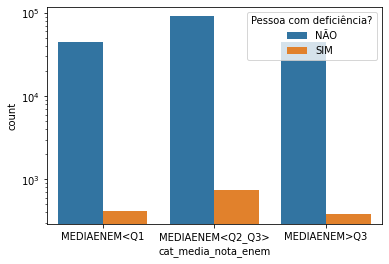

In [366]:
g = sns.countplot(x='cat_media_nota_enem', hue = 'Pessoa com deficiência?', data=fies2020)
g.set_yscale("log")

#### Média nota Enem x Sexo?

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Conforme é possível observar, aparentemente neste ano, tem-se mais mulheres inscritas no FIES do que homens, o que também influencia nos dados

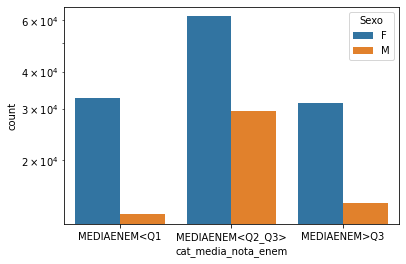

In [367]:
g = sns.countplot(x='cat_media_nota_enem', hue = 'Sexo', data=fies2020)
g.set_yscale("log")

#### Média nota Enem x Concluiu Curso Superior?

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Assim como no caso das pessoas com deficiência, as pessoas que concluiram curso superior também representam uma parcela muito menor dos participantes do FIES

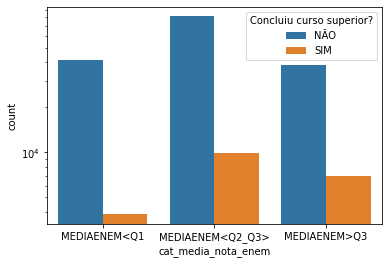

In [368]:
g = sns.countplot(x='cat_media_nota_enem', hue = 'Concluiu curso superior?', data=fies2020)
g.set_yscale("log")

#### Média nota Enem x Nº de membros família

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Neste caso, o que apresenta ter uma relação maior é no caso da nota média do enem ser acima do quartil 3 e a família possuir mais que 3 membros.

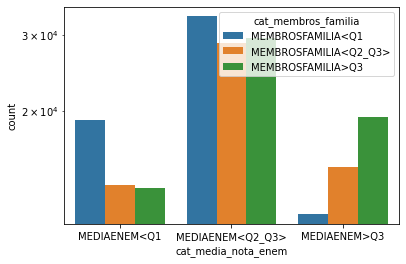

In [369]:
g = sns.countplot(x='cat_media_nota_enem', hue = 'cat_membros_familia', data=fies2020)
g.set_yscale("log")

#### Média nota Enem x Renda Per capita?

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Uma outra correlação clara é entre a renda per capita e possuir uma nota alta para o enem, assim como observado no gráfico

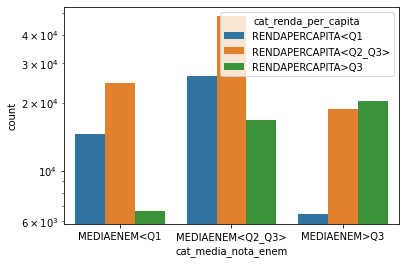

In [370]:
g = sns.countplot(x='cat_media_nota_enem', hue = 'cat_renda_per_capita', data=fies2020)
g.set_yscale("log")

#### Média nota Enem x Ano de conclusão do Ensino Médio

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Por meio de tal gráfico pode-se observar, também que há mais pessoas presentes entre o quartil 2 e 3 de conclusão do ensino médio

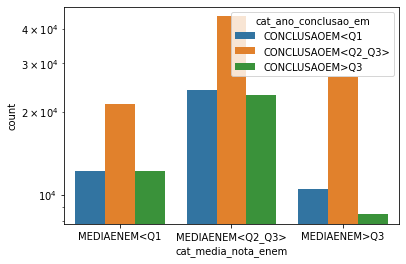

In [371]:
g = sns.countplot(x='cat_media_nota_enem', hue = 'cat_ano_conclusao_em', data=fies2020)
g.set_yscale("log")

#### Média nota Enem x Etnia/Cor

Observe que a escala logarítmica foi usada para poder visualizar melhor os dados. Por meio de tal gráfico pode-se observar, também que há mais pessoas presentes entre o quartil 2 e 3 que são pardas, assim como indicado pelas regras de associação

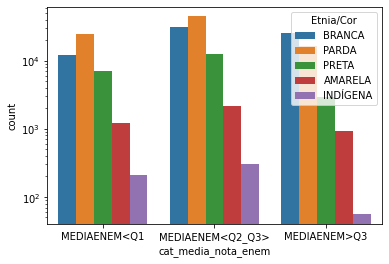

In [372]:
g = sns.countplot(x='cat_media_nota_enem', hue = 'Etnia/Cor', data=fies2020)
g.set_yscale("log")